<a href="https://colab.research.google.com/github/Sid2318/Spam-Email-Prediction-Logistic-regression-/blob/main/Spam_Mail_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
dataset = pd.read_csv('/content/mail_data.csv')

In [19]:
dataset.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
dataset.shape

(5572, 2)

In [21]:
dataset.isnull().sum()

,0
Category,0
Message,0


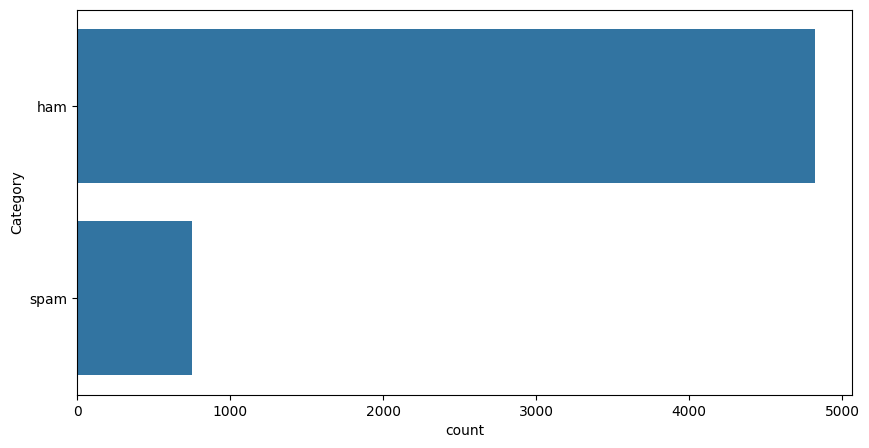

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(dataset['Category'])
plt.show()

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [28]:
#label Encoding
# label spam mail as 0;  ham mail as 1;

dataset.loc[dataset['Category'] == 'spam', 'Category',] = 0
dataset.loc[dataset['Category'] == 'ham', 'Category',] = 1

In [29]:
dataset.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
# separating the data as texts and label

X = dataset['Message']
Y = dataset['Category']

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [34]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [36]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True) # Changed 'True' to True

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [37]:
X_train

,Message
3075,Don know. I did't msg him recently.
1787,Do you know why god created gap between your f...
1614,Thnx dude. u guys out 2nite?
4304,Yup i'm free...
3266,"44 7732584351, Do you want a New Nokia 3510i c..."
...,...
789,"5 Free Top Polyphonic Tones call 087018728737,..."
968,What do u want when i come back?.a beautiful n...
1667,Guess who spent all last night phasing in and ...
3321,Eh sorry leh... I din c ur msg. Not sad alread...


In [38]:
X_train_features

<4457x7431 sparse matrix of type '<class 'numpy.float64'>'
	with 34775 stored elements in Compressed Sparse Row format>

In [39]:
model = LogisticRegression()

In [40]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

In [41]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [42]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9676912721561588


In [43]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail
